In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import Counter

In [ ]:
titanic_training_dataset = pd.read_csv('/content/train.csv')
titanic_training_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_testing_dataset = pd.read_csv('/content/test.csv')
titanic_testing_dataset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_training_dataset["Sex"].replace(['male', 'female'], ['0', '1'], inplace=True)
titanic_training_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_testing_dataset["Sex"].replace(['male', 'female'], ['0', '1'], inplace=True)
titanic_testing_dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic_training_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_testing_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic_training_dataset["Age"].fillna(28, inplace=True)
titanic_training_dataset["Cabin"].fillna(-1, inplace=True)
titanic_training_dataset['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3], inplace=True)
titanic_training_dataset['Embarked'].fillna(1.0, inplace=True)
titanic_training_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,-1,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,-1,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,-1,3.0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,-1,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,3.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,-1,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,-1,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,-1,1.0


In [ ]:
titanic_testing_dataset["Age"].fillna(27, inplace=True)
titanic_testing_dataset["Cabin"].fillna(-1, inplace=True)
titanic_testing_dataset['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3], inplace=True)
titanic_testing_dataset['Embarked'].fillna(1.0, inplace=True)
titanic_testing_dataset['Fare'].fillna(14.454200, inplace=True)
titanic_testing_dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,-1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,-1,3
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,-1,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,-1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,-1,3
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,-1,3
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,-1,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,-1,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,-1,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,-1,3


In [ ]:
titanic_training_dataset["Cabin"].unique()

array([-1, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       

In [ ]:
titanic_testing_dataset["Cabin"].unique()

array([-1, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [ ]:
def encode_cabins(floor, value, dataset):
    mask = (dataset["Cabin"].str.contains(floor) & (dataset["Cabin"].notna()))
    dataset.loc[mask, "Cabin"] = value

In [ ]:
encode_cabins('T', 0, titanic_training_dataset)
encode_cabins('A', 1, titanic_training_dataset)
encode_cabins('B', 2, titanic_training_dataset)
encode_cabins('C', 3, titanic_training_dataset)
encode_cabins('D', 4, titanic_training_dataset)
encode_cabins('E', 5, titanic_training_dataset)
encode_cabins('F', 6, titanic_training_dataset)
encode_cabins('G', 7, titanic_training_dataset)
titanic_training_dataset.head(22)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,-1,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,-1,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,-1,3.0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,-1,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,5,3.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,-1,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,-1,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,-1,1.0


In [ ]:
encode_cabins('A', 1, titanic_testing_dataset)
encode_cabins('B', 2, titanic_testing_dataset)
encode_cabins('C', 3, titanic_testing_dataset)
encode_cabins('D', 4, titanic_testing_dataset)
encode_cabins('E', 5, titanic_testing_dataset)
encode_cabins('F', 6, titanic_testing_dataset)
encode_cabins('G', 7, titanic_testing_dataset)
titanic_testing_dataset.head(22)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,-1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,-1,3
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,-1,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,-1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,-1,3
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,-1,3
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,-1,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,-1,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,-1,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,-1,3


In [ ]:
titanic_testing_dataset["Cabin"].value_counts()

-1    327
 3     35
 2     18
 4     13
 5     11
 1      7
 6      6
 7      1
Name: Cabin, dtype: int64

## Substitution of cabin values, based on probability

In [ ]:
data = {'Cabin': [-1, 3, 2, 5, 4, 1, 6, 7],
       'Counts': [327, 35, 18, 11, 13, 7, 6, 1]}
df = pd.DataFrame(data)

# Extract probabilities (excluding the -1 value)
valid_rows = df[df['Cabin'] != -1]
total = valid_rows['Counts'].sum()
valid_rows['Probabilities'] = valid_rows['Counts'] / total

# Randomly sample for -1 rows based on these probabilities
num_minus_ones = df[df['Cabin'] == -1]['Counts'].iloc[0]
replacements = np.random.choice(valid_rows['Cabin'], size=num_minus_ones, p=valid_rows['Probabilities'])

# Assuming you have a bigger dataframe named big_df with the 'Cabin' column:
big_df = pd.DataFrame({'Cabin': [-1]*327 + [3]*35 + [2]*18 + [5]*11 + [4]*13 + [1]*7 + [6]*6 + [7]*1})
mask = big_df['Cabin'] == -1
big_df.loc[mask, 'Cabin'] = replacements

titanic_testing_dataset["Cabin"] = big_df["Cabin"]
titanic_testing_dataset.head()

<ipython-input-16-2f3bafb1663d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['Probabilities'] = valid_rows['Counts'] / total


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,6,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,3,3
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,3,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,3,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,7,3


In [ ]:
data = {'Cabin': [-1, 3, 2, 5, 4, 1, 6, 7, 0],
       'Counts': [687, 59, 47, 33, 33, 15, 12, 4, 1]}
df = pd.DataFrame(data)

# Extract probabilities (excluding the -1 value)
valid_rows = df[df['Cabin'] != -1]
total = valid_rows['Counts'].sum()
valid_rows['Probabilities'] = valid_rows['Counts'] / total

# Randomly sample for -1 rows based on these probabilities
num_minus_ones = df[df['Cabin'] == -1]['Counts'].iloc[0]
replacements = np.random.choice(valid_rows['Cabin'], size=num_minus_ones, p=valid_rows['Probabilities'])

# Assuming you have a bigger dataframe named big_df with the 'Cabin' column:
big_df = pd.DataFrame({'Cabin': [-1]*687 + [3]*59 + [2]*47 + [5]*33 + [4]*33 + [1]*15 + [6]*12 + [7]*4 + [0]*1})
mask = big_df['Cabin'] == -1
big_df.loc[mask, 'Cabin'] = replacements

titanic_training_dataset["Cabin"] = big_df["Cabin"]
titanic_training_dataset.head()

<ipython-input-17-a7b872e8085f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['Probabilities'] = valid_rows['Counts'] / total


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,4,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,6,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,3,3.0


In [ ]:
titanic_training_dataset.drop(columns=['Ticket', 'Name', 'PassengerId'], inplace=True)
titanic_training_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,4,3.0
1,1,1,1,38.0,1,0,71.2833,6,1.0
2,1,3,1,26.0,0,0,7.9250,3,3.0
3,1,1,1,35.0,1,0,53.1000,3,3.0
4,0,3,0,35.0,0,0,8.0500,3,3.0


<ipython-input-19-c1e705596514>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic_training_dataset.corr()


<Axes: >

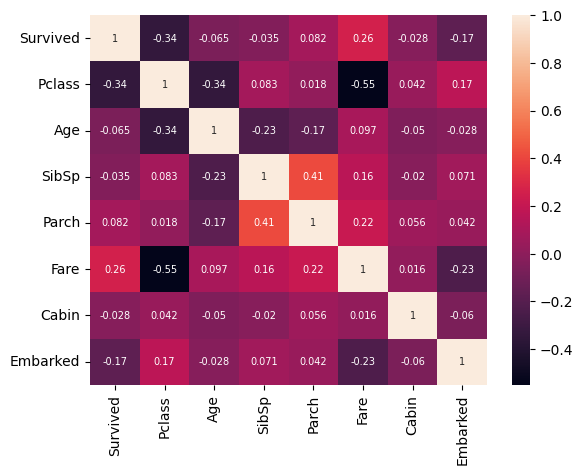

In [ ]:
corr = titanic_training_dataset.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 7})

In [ ]:
titanic_training_dataset['Embarked'].value_counts()

3.0    644
1.0    170
2.0     77
Name: Embarked, dtype: int64

In [ ]:
X = titanic_training_dataset[['Pclass', 'Sex', 'Fare', 'Embarked']]
y = titanic_training_dataset['Survived']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error: 0.14545923911590475
Coefficients: [-1.40446376e-01  5.11173460e-01  1.21900833e-04 -4.94236308e-02]


## Calculating test data's survival probabilities

In [ ]:
X_test_csv = titanic_testing_dataset[['Pclass', 'Sex', 'Fare', 'Embarked']]
X_test_csv

,Pclass,Sex,Fare,Embarked
0,3,0,7.8292,2
1,3,1,7.0000,3
2,2,0,9.6875,2
3,3,0,8.6625,3
4,3,1,12.2875,3
...,...,...,...,...
413,3,0,8.0500,3
414,1,1,108.9000,1
415,3,0,7.2500,3
416,3,0,8.0500,3


In [ ]:
y_pred_test_csv = model.predict(X_test_csv)
np.round(y_pred_test_csv)

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
print(y_pred_test_csv.size)

418


In [ ]:
final_table = pd.DataFrame({'PassengerId': titanic_testing_dataset['PassengerId'], 'Survived': np.round(y_pred_test_csv).astype(int)})
final_table.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
final_table.to_csv('prediction.csv', index=False)